# Temat: Co z moim pociągiem?
https://www.kaggle.com/datasets/gatandubuc/public-transport-traffic-data-in-france

#### Celem jest przygotowanie danych do modelowania
#### Kwestia otwarta czy chcemy modelowanie w naszych projektach 

moim pociągiem?
https://www.kaggle.com/datasets/gatandubuc/public-transport-traffic-data-in-france

## Cel -> analiza opóźnień pociągów we Francji

## Stakeholder -> zarządca kolejowy, który potrzebuje zidentyfikować powody opóźnień na wybranych liniach kolejowych


#### Import bibliotek

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import trains as tf
import random


#### Wczytanie pliku Regularities_by_liaisons_Trains_France.csv

In [13]:
df = pd.read_csv('kaggle_data/Regularities_by_liaisons_Trains_France.csv')

#### Wyświetlanie WSZYSTKICH kolumn w VS Code

In [14]:
pd.set_option('display.max_columns', None)

#### Kopia zapasowa pliku CSV

In [5]:
df_clean = df.copy()

#### Wstawienie "_" w miejsce spacji

In [15]:
df.columns = df.columns.str.replace(" ", "_")

#### Usunięcie 2 kolumn

In [16]:
df.drop(['Comment_(optional)_delays_at_departure', 'Comment_(optional)_delays_on_arrival'], axis=1, inplace=True)


#### Sprawdzenie czy dane są zduplikowane

In [9]:
df.duplicated().sum()

0

In [6]:
df.head()

,Year,Month,Departure_station,Arrival_station,Average_travel_time_(min),Number_of_expected_circulations,Number_of_cancelled_trains,Number_of_late_trains_at_departure,Average_delay_of_late_departing_trains_(min),Average_delay_of_all_departing_trains_(min),Number_of_trains_late_on_arrival,Average_delay_of_late_arriving_trains_(min),Average_delay_of_all_arriving_trains_(min),"%_trains_late_due_to_external_causes_(weather,_obstacles,_suspicious_packages,_malevolence,_social_movements,_etc.)","%_trains_late_due_to_railway_infrastructure_(maintenance,_works)","%_trains_late_due_to_traffic_management_(rail_line_traffic,_network_interactions)",%_trains_late_due_to_rolling_stock,%_trains_late_due_to_station_management_and_reuse_of_material,"%_trains_late_due_to_passenger_traffic_(affluence,_PSH_management,_connections)",Number_of_late_trains_>_15min,Average_train_delay_>_15min,Number_of_late_trains_>_30min,Number_of_late_trains_>_60min,Period,Delay_due_to_external_causes,Delay_due_to_railway_infrastructure,Delay_due_to_traffic_management,Delay_due_to_rolling_stock,Delay_due_to_station_management_and_reuse_of_material,Delay_due_to_travellers_taken_into_account
0,2019,7.0,ANGOULEME,PARIS MONTPARNASSE,131.914980,247.0,0.0,191.0,3.576353,2.678273,41.0,22.924797,5.233333,0.250000,0.150000,0.275000,0.125000,0.025000,0.175000,21.0,32.965873,7.0,2.0,2019-07,25.000000,15.000000,27.500000,12.500000,2.500000,17.500000
1,2019,7.0,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242.0,0.0,178.0,9.780805,7.033609,47.0,27.085106,6.123967,0.200000,0.244444,0.266667,0.244444,0.000000,0.044444,35.0,32.057143,14.0,2.0,2019-07,20.000000,24.444444,26.666667,24.444444,0.000000,4.444444
2,2019,7.0,LE MANS,PARIS MONTPARNASSE,62.395349,435.0,5.0,391.0,3.896974,3.529341,91.0,18.440659,4.430194,0.161765,0.323529,0.264706,0.147059,0.029412,0.073529,30.0,42.367241,13.0,4.0,2019-07,16.176471,32.352941,26.470588,14.705882,2.941176,7.352941
3,2019,7.0,ST MALO,PARIS MONTPARNASSE,172.421053,114.0,0.0,101.0,1.950990,1.685673,15.0,20.618889,3.812135,0.153846,0.153846,0.230769,0.384615,0.000000,0.076923,8.0,27.620833,2.0,0.0,2019-07,15.384615,15.384615,23.076923,38.461538,0.000000,7.692308
4,2019,7.0,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404.0,4.0,284.0,8.379108,5.803125,73.0,19.608447,4.176208,0.184615,0.123077,0.400000,0.169231,0.076923,0.046154,28.0,37.658333,12.0,3.0,2019-07,18.461538,12.307692,40.000000,16.923077,7.692308,4.615385


In [64]:
pd.set_option('display.max_columns', None)
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Opóźnienia  1 non-null      object
dtypes: object(1)
memory usage: 140.0+ bytes


In [14]:
tf.fun()

Hello


In [14]:
df.Year.value_counts()

Year
2018    1560
2019    1476
2015    1344
2017    1344
2016    1344
2020     738
Name: count, dtype: int64

In [28]:
df.describe()

,Year,Month,Average_travel_time_(min),Number_of_expected_circulations,Number_of_cancelled_trains,Number_of_late_trains_at_departure,Average_delay_of_late_departing_trains_(min),Average_delay_of_all_departing_trains_(min),Number_of_trains_late_on_arrival,Average_delay_of_late_arriving_trains_(min),Average_delay_of_all_arriving_trains_(min),"%_trains_late_due_to_external_causes_(weather,_obstacles,_suspicious_packages,_malevolence,_social_movements,_etc.)","%_trains_late_due_to_railway_infrastructure_(maintenance,_works)","%_trains_late_due_to_traffic_management_(rail_line_traffic,_network_interactions)",%_trains_late_due_to_rolling_stock,Late_trains,"%_trains_late_due_to_passenger_traffic_(affluence,_PSH_management,_connections)",Number_of_late_trains_>_15min,Average_train_delay_>_15min,Number_of_late_trains_>_30min,Number_of_late_trains_>_60min,Delay_due_to_external_causes,Delay_due_to_railway_infrastructure,Delay_due_to_traffic_management,Delay_due_to_rolling_stock,Delay,Delay_due_to_travellers_taken_into_account
count,7806.000000,7806.000000,7743.000000,7743.000000,7806.000000,7806.000000,7806.000000,7743.000000,7706.000000,7705.000000,7743.000000,7535.000000,7535.000000,7535.000000,7535.000000,7535.000000,7535.000000,7738.000000,7699.000000,7738.000000,7738.000000,7535.000000,7535.000000,7535.000000,7535.000000,7535.000000,7535.000000
mean,2017.345119,6.216372,166.759261,266.510913,7.911478,63.519088,14.744145,2.956191,36.019595,32.737533,5.212800,0.267085,0.255042,0.191950,0.181099,0.067688,0.036435,24.545231,29.379555,11.055441,4.000129,26.708546,25.504166,19.195005,18.109877,6.768831,3.643517
std,1.596611,3.440601,80.737092,157.456548,20.997806,78.822324,13.373758,5.951154,29.210396,14.009948,8.397351,0.162804,0.160101,0.148808,0.132821,0.078780,0.057827,20.323532,18.929319,9.921009,4.459822,16.280439,16.010052,14.880847,13.282123,7.877975,5.782651
min,2015.000000,1.000000,35.888889,1.000000,0.000000,0.000000,0.000000,-229.269444,0.000000,-40.109259,-472.638889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-118.022363,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,3.000000,100.643605,163.000000,0.000000,12.000000,7.559617,1.007765,16.000000,23.809420,2.829885,0.156250,0.150000,0.086957,0.092593,0.000000,0.000000,10.000000,9.177749,4.000000,1.000000,15.625000,15.000000,8.695652,9.259259,0.000000,0.000000
50%,2017.000000,6.000000,162.178808,227.000000,1.000000,33.000000,13.535727,2.014571,28.000000,30.875000,4.680056,0.250000,0.235294,0.171429,0.161290,0.050000,0.017544,19.000000,32.022500,8.000000,3.000000,25.000000,23.529412,17.142857,16.129032,5.000000,1.754386
75%,2019.000000,9.000000,207.885957,352.000000,6.000000,84.000000,18.713366,3.691398,48.000000,39.124653,7.278924,0.357143,0.333333,0.269231,0.250000,0.100000,0.055556,33.000000,41.313095,15.000000,6.000000,35.714286,33.333333,26.923077,25.000000,10.000000,5.555556
max,2020.000000,12.000000,786.500000,960.000000,279.000000,591.000000,316.188095,173.571429,235.000000,258.000000,83.388889,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,192.000000,258.000000,91.000000,37.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


#### Grupowanie po Departure_station i wyświetlenie średniego czasu podróży


#### 10 największych opóźnień pociągów wraz ze stacjami

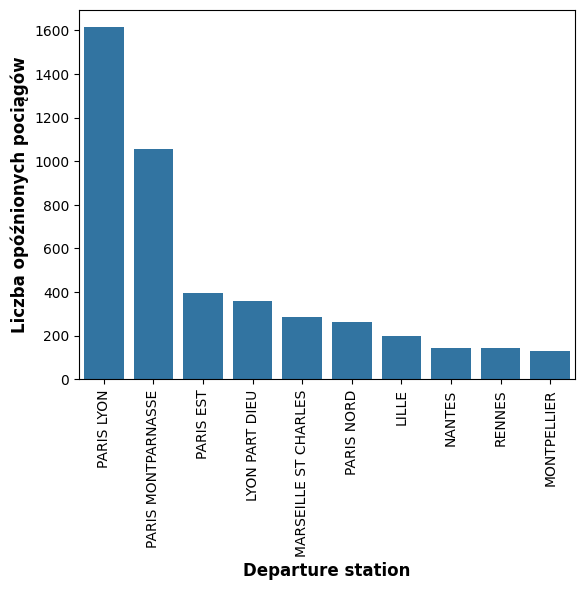

In [8]:
colors = random.sample(sns.color_palette("husl", 10), 10)

sns.countplot(data = df, x = "Departure_station", order = df['Departure_station'].value_counts().index[:10], legend=False)

plt.ylabel("Liczba opóźnionych pociągów", fontweight = "bold", fontsize = 12)
plt.xlabel("Departure station", fontweight = "bold", fontsize = 12)
plt.xticks(rotation = 90,)
plt.show()

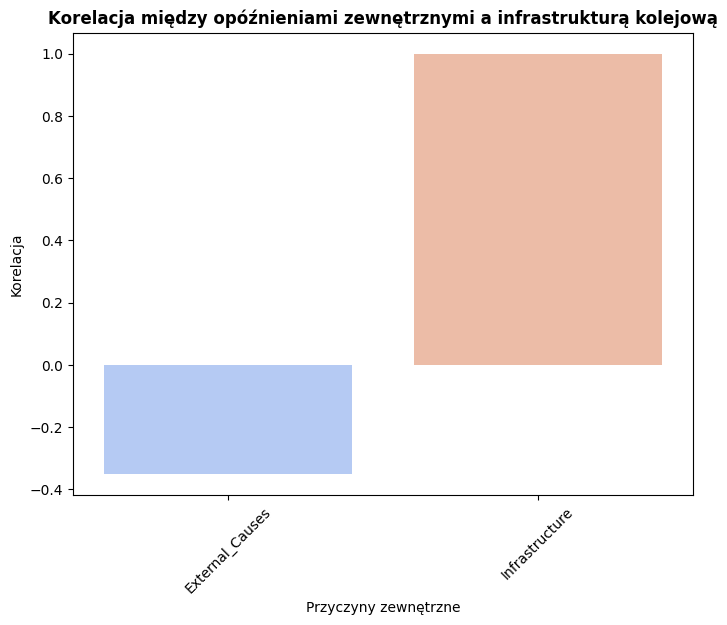

In [77]:
column_al = {
"%_trains_late_due_to_external_causes_(weather,_obstacles,_suspicious_packages,_malevolence,_social_movements,_etc.)": "External_Causes",
"%_trains_late_due_to_railway_infrastructure_(maintenance,_works)": "Infrastructure"
}

#df.rename(columns = column_al, inplace = True)

correlation_matrix = df[list(column_al.values())].corr()

# Wygeneruj wykres słupkowy
plt.figure(figsize=(8, 6))

sns.barplot(x = correlation_matrix.index, y = correlation_matrix['Infrastructure'], hue = correlation_matrix.index, palette = "coolwarm")
plt.title("Korelacja między opóźnieniami zewnętrznymi a infrastrukturą kolejową", fontweight = "bold")
plt.xlabel("Przyczyny zewnętrzne")
plt.ylabel("Korelacja")
plt.xticks(rotation = 45)

#sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

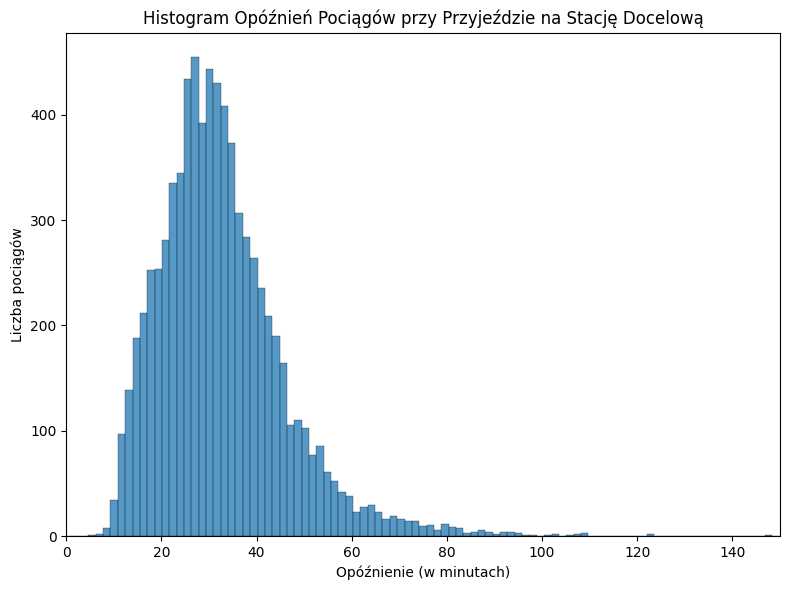

In [6]:
# Utwórz histogram za pomocą seaborn na podstawie rzeczywistych danych
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Average_delay_of_late_arriving_trains_(min)')
plt.title('Histogram Opóźnień Pociągów dot. Przyjazdu na Stację Docelową')
plt.xlabel('Opóźnienie (w minutach)')
plt.ylabel('Liczba pociągów')

#plt.ylim(0, 1000)
plt.xlim(0, 150)

#stacje = df['Departure_station'].unique()[:3]
#plt.xticks(range(len(stacje)), stacje, rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### Zrobić regresję regplot(), modelowanie, WSPÓŁLINIOWOŚĆ

In [18]:
df['Year'].value_counts()

Year
2018    1560
2019    1476
2015    1344
2017    1344
2016    1344
2020     738
Name: count, dtype: int64

# Warto zacząć od Scatter plot
### Łączymy linie kolejowe i bierzemy pod uwagę late arriving trains i all arriving trains

In [21]:
df.groupby("Average_travel_time_(min)")["Number_of_expected_circulations"].mean().nlargest(10)

Average_travel_time_(min)
148.309724    960.0
142.443670    896.0
142.167051    894.0
141.071174    878.0
140.289346    876.0
143.052934    871.0
141.109827    870.0
142.851415    864.0
143.317967    858.0
140.895270    844.0
Name: Number_of_expected_circulations, dtype: float64

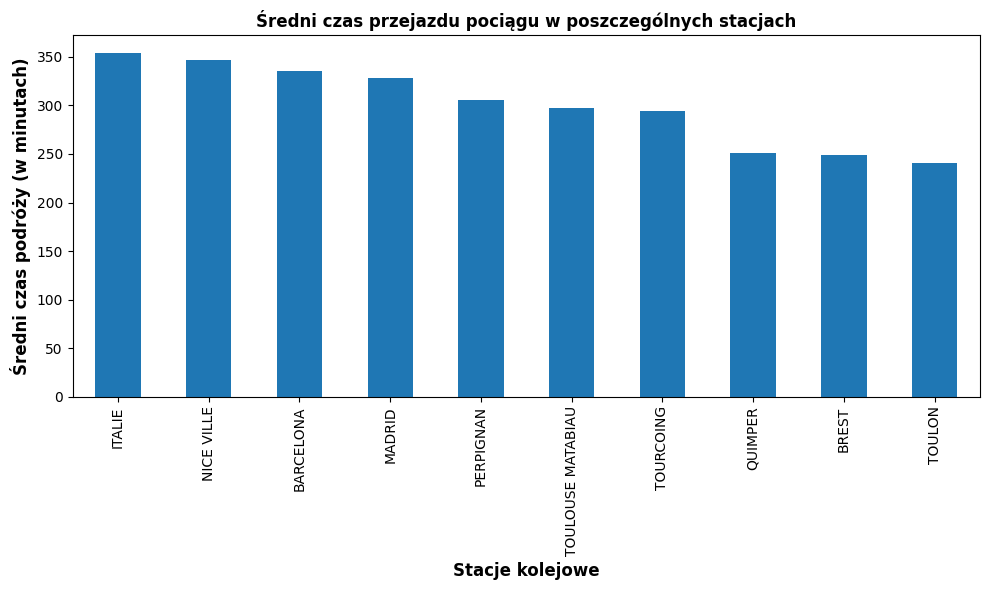

In [20]:
average_travel_time = df.groupby("Departure_station")["Average_travel_time_(min)"].mean().nlargest(10)

# Wygenerowanie wykresu słupkowego
ax = average_travel_time.plot(kind="bar", figsize=(10, 6))

#ax.set_xticklabels(average_travel_time.index, ha="right")
ax.set_xlabel("Stacje kolejowe", fontweight = "bold", fontsize = 12)
ax.set_ylabel("Średni czas podróży (w minutach)", fontweight = "bold", fontsize = 12)
ax.set_title("Średni czas przejazdu pociągu w poszczególnych stacjach", fontweight = "bold", fontsize = 12)

plt.tight_layout()
plt.show()